In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, regularizers

In [2]:
files = glob.glob('datasets/*monkey*/**/*jpg', recursive = True)

In [3]:
files[0].split('/')[3:]

['training', 'n0', 'n0038.jpg']

In [4]:
df = pd.DataFrame(data = np.array([file.split('/')[3:-1] for file in files], dtype = str), columns = ['train_type', 'label'])
df['path'] = files
df['label'] = pd.Categorical(df.label)

In [5]:
df.head()

,train_type,label,path
0,training,n0,datasets/10-monkey-species/training/training/n...
1,training,n0,datasets/10-monkey-species/training/training/n...
2,training,n0,datasets/10-monkey-species/training/training/n...
3,training,n0,datasets/10-monkey-species/training/training/n...
4,training,n0,datasets/10-monkey-species/training/training/n...


In [6]:
category = pd.get_dummies(df.label, prefix = 'category')

In [7]:
category.head()

,category_n0,category_n1,category_n2,category_n3,category_n4,category_n5,category_n6,category_n7,category_n8,category_n9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [8]:
ims = np.array([np.array(image.load_img(file,target_size=(256, 256))) for file in files])

In [9]:
ims.shape

(1369, 256, 256, 3)

In [10]:
training = df.train_type == 'training'

In [11]:
x_train, y_train = ims[training], category[training]
x_test, y_test = ims[~training], category[~training]

In [12]:
x_train.shape

(1097, 256, 256, 3)

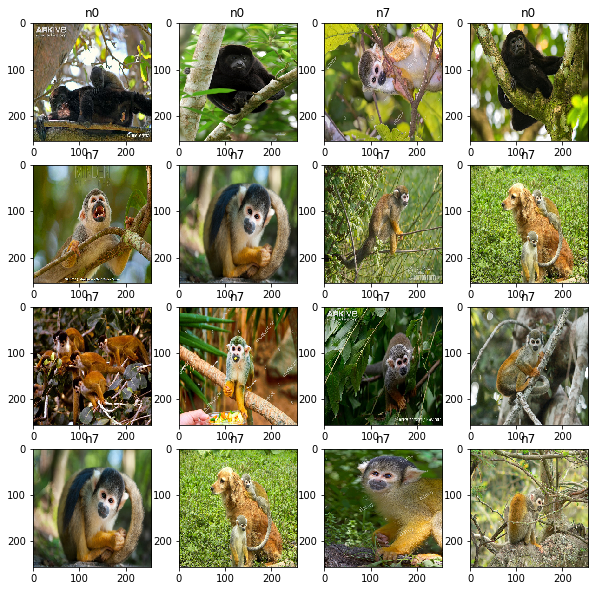

In [13]:
plt.figure(figsize = (10, 10))
l = np.random.randint(low = 200, size =(16)) 
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[l[i]])
    plt.title(df.label[l[i]])

In [14]:
datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [15]:
datagen.fit(x_train)

In [34]:
def create_model(x):
    model = models.Sequential()
    model.add(layers.Conv2D(32, input_shape = x.shape[1:], kernel_size = (3, 3), strides = (1, 1), padding = 'same',  kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    
    model.add(layers.Flatten())
    #model.add(layers.Dense(64, activation ='relu',kernel_regularizer=regularizers.l2(0.1)))
    model.add(layers.Dense(10, activation ='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    

In [35]:
model = create_model(x_train)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)       

In [37]:
batch_size = 64

In [38]:
#model.fit(x_train, y_train, batch_size = batch_size, epochs = 10)

In [39]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=10)
                    

Epoch 1/10
18/17 [===============================] - 45s 3s/step - loss: 37.8294 - acc: 0.0994
Epoch 2/10
18/17 [===============================] - 55s 3s/step - loss: 7.9775 - acc: 0.1376
Epoch 3/10
18/17 [===============================] - 45s 2s/step - loss: 5.8290 - acc: 0.1860
Epoch 4/10
18/17 [===============================] - 49s 3s/step - loss: 4.9863 - acc: 0.1987
Epoch 5/10
18/17 [===============================] - 52s 3s/step - loss: 4.5110 - acc: 0.2206
Epoch 6/10
18/17 [===============================] - 46s 3s/step - loss: 4.1348 - acc: 0.2179
Epoch 7/10
18/17 [===============================] - 68s 4s/step - loss: 4.0153 - acc: 0.2097
Epoch 8/10
18/17 [===============================] - 53s 3s/step - loss: 3.6955 - acc: 0.2507
Epoch 9/10
18/17 [===============================] - 63s 3s/step - loss: 3.6132 - acc: 0.2698
Epoch 10/10
18/17 [===============================] - 64s 4s/step - loss: 3.6701 - acc: 0.2425


In [ ]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

 608/1097 [===============>..............] - ETA: 10s - loss: 3.9329 - acc: 0.2401